# Titanic-> Using All Algorithms | Ultimate Notebook

Before starting this i would like to give credits to Mr.Manav Sehgal and his absolutely beautiful explanatory notebook that inspired me to make a my own new, shorter and simplar notebook. Kaggle Team's Alexis Cook's Titanic Tutorial for making me understand concepts in simplest way possible.

**Also before starting, This notebook is a tutorial for beginners who just want to dive into how everything is done, How various models are used to solve this problem and NOT made for increasing public scoring.**

## Our Approach towards this problem
**How is this Notebook different than others?**
-> We will Acquire, Analyze, Make clear Assumations and Vizualize for each algorithm together and avoid making a huge notebook of each and every algorithm seperately.

**Thank you all for viewing this, I understand you are here looking at the beautiful Title of the notebook, so wont waste your time and let's get right into it.**

# Algorithm's used to Solve
* XG Boost
* Ada Boost
* Gradient Boost
* Logistic Regression
* Linear SVC
* Random Forest
* K Neigbours
* Gaussian NB
* Perceptron 
* SGDC Classifer
* Decision Tree 


Also dont worry if it seems too much at this stage, 
First we will explore and analyze our data and then use the above mentioned alogorithms to predict our answers.

### STEP 1:
1. Import the neccessary libraries for data analysis
2. Import library for Visualization
3. Import Libraries for ML algorithms

In [1]:
# for data analysis
import pandas as pd
import numpy as np
import random as rnd

# for viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# usual ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
##xgBoost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#adaBoost
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostClassifier

#gradientBoosting
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

### Step 2:
1. Get the data (Literally! or we can say "to acquire" the data and load it into our DataFrame(pandas).
2. Analyze what is present in the dataset.
  * **Categorize** features (weather they are categorical,numerical etc).
  * **Indentify** if certain features are mixed (numerical with text for example)
  * **Typos** (we are dealing with names here, we dont know who uses which title and if they name includes nicknames within etc, we  focus on finding errors and typos whenever dealing with names to avoid problems later in the model)
3. Preview the present data.

#### Getting the Data ✔️

In [2]:
# getting/acquiring our data
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv('../input/titanic/test.csv')
# we are using combine for operations to run on both train and test which will be used later.
combine = [train_df, test_df]


# we print values of columns which gives us nothing but our features
print(train_df.columns.values)


# preview the data
train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Analyzing Data ✔️
#### Preview Data ✔️ 
**This will be done in a single step ahead, Do read ahead. (NO Spoilers).

To get better understanding of various categories in the dataset, read [here](https://www.kaggle.com/c/titanic/data).

#### Categorical values
These are types of data which can be divided into group.
* In our dataset we have -> Survived, Sex and Embarked.

**Note** We have a value Pclass. Which is also categorical but it has a certain order fixed to it so we call it as **Ordinal**.

#### Numerical Values
These are values (numeric ofcourse!), but have an abosolute value to it, a specific measure of some amount.
Here it would be -> Fare,Age.

**Note** Here too we have another special value called Discrete Data which means it can have only certain values.
Best example would be roling of 2 dice and the only values we have have is 2,3,4,5,6,7,8,9,10,11 and 12.

**Summing up**
* Categorical: Survived, Sex, and Embarked.
* Ordinal: Pclass.
* Continous: Age, Fare.
* Discrete: SibSp, Parch.





<div class="alert alert-block alert-success">
    Now wait, this is getting too long and we have to analyze all of this by ourselfes and there is so so much left! 
    What if i told you one line of code and give you all the EDA you need to figure out everything, Literally, I mean plots, Values, Correlation everything. Look at the magic below.

</div>

In [3]:
# our magic library
import pandas_profiling 
train_df.profile_report()

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Wait! Did you say Interactive plots? CHECK ✔️

In [4]:
## lets not mix our train csv so we create another variable
titanic_df = pd.read_csv('/kaggle/input/titanic/train.csv')


from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [5]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().iplot(kind='bar')
titanic_df[['Sex','Survived']].groupby(['Sex']).mean().iplot(kind='barh')
titanic_df.iplot()

### Step 3:

### Wrangle Data 

**Okay, This is one of the most crucial steps but here, the main aim of this NoteBook was not to explain step by step on how to wrangle our data , there are lot of books existing for that same, but to compare all the Algorithms in short.
I would suggest you to follow this [link](https://www.kaggle.com/startupsci/titanic-data-science-solutions#Wrangle-data) (just click the link and and give it a few seconds, it will take you directly to that particular section of the of the page), how the data was wrangled and what changes we made**.

The complete code for Data wrangling is hidden, cause i've used above link for the reference. I suggest you to follow that link if you want to get the details of that part.


In [6]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [7]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [8]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [9]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1

In [10]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [11]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



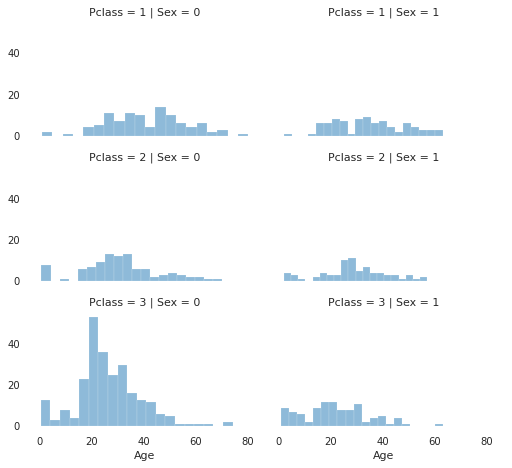

In [12]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [13]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [14]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0   22      1      0   7.2500        S      1
1         1       1    1   38      1      0  71.2833        C      3
2         1       3    1   26      0      0   7.9250        S      2
3         1       1    1   35      1      0  53.1000        S      3
4         0       3    0   35      0      0   8.0500        S      1

In [15]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

In [16]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

33     66
54     65
96     71
116    70
280    65
456    65
493    71
630    80
672    70
745    70
851    74
Name: Age, dtype: int64

81    67
96    76
Name: Age, dtype: int64

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title  \
0         0       3    0    1      1      0   7.2500        S      1   
1         1       1    1    2      1      0  71.2833        C      3   
2         1       3    1    1      0      0   7.9250        S      2   
3         1       1    1    2      1      0  53.1000        S      3   
4         0       3    0    2      0      0   8.0500        S      1   

        AgeBand  
0  (16.0, 32.0]  
1  (32.0, 48.0]  
2  (16.0, 32.0]  
3  (32.0, 48.0]  
4  (32.0, 48.0]

In [17]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0    1      1      0   7.2500        S      1
1         1       1    1    2      1      0  71.2833        C      3
2         1       3    1    1      0      0   7.9250        S      2
3         1       1    1    2      1      0  53.1000        S      3
4         0       3    0    2      0      0   8.0500        S      1

In [18]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

In [19]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

IsAlone  Survived
0        0  0.505650
1        1  0.303538

In [20]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0         0       3    0    1   7.2500        S      1        0
1         1       1    1    2  71.2833        C      3        0
2         1       3    1    1   7.9250        S      2        1
3         1       1    1    2  53.1000        S      3        0
4         0       3    0    2   8.0500        S      1        1

In [21]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

Age*Class  Age  Pclass
0          3    1       3
1          2    2       1
2          3    1       3
3          2    2       1
4          6    2       3
5          3    1       3
6          3    3       1
7          0    0       3
8          3    1       3
9          0    0       2

In [22]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [23]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

In [24]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1   7.2500         0      1        0          3
1         1       1    1    2  71.2833         1      3        0          2
2         1       3    1    1   7.9250         0      2        1          3
3         1       1    1    2  53.1000         0      3        0          2
4         0       3    0    2   8.0500         0      1        1          6

In [25]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

PassengerId  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2   7.8292         2      1        1          6
1          893       3    1    2   7.0000         0      3        0          6
2          894       2    0    3   9.6875         2      1        1          6
3          895       3    0    1   8.6625         0      1        1          3
4          896       3    1    1  12.2875         0      3        0          3

In [26]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [27]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0         0      1        0          3
1         1       1    1    2     3         1      3        0          2
2         1       3    1    1     1         0      2        1          3
3         1       1    1    2     3         0      3        0          2
4         0       3    0    2     1         0      1        1          6
5         0       3    0    1     1         2      1        1          3
6         0       1    0    3     3         0      1        1          3
7         0       3    0    0     2         0      4        0          0
8         1       3    1    1     1         0      3        0          3
9         1       2    1    0     2         1      3        0          0

## Finally! Models.....

**Let's get right into this**
Also we will skip the information about how and what every model works and does.

In [28]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### KNN - K-nearest-neighbours

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

KNeighborsClassifier(n_neighbors=3)

84.74

### Support Vector Machines 

In [30]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

SVC()

78.23

### Logistic Regression

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

LogisticRegression()

80.36

### Naive Bayes

In [32]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

GaussianNB()

72.28

### Perceptron

In [33]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

Perceptron()

78.34

### Linear SVC

In [34]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

79.12

### Stochastic Gradient Descent

In [35]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

SGDClassifier()

73.51

### Decision Tree

In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

DecisionTreeClassifier()

86.76

### Random Forest

In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

RandomForestClassifier()

0.867564534231201

86.76

### XG Boost

In [38]:
xg_boost = XGBClassifier()
xg_boost.fit(X_train, Y_train)
Y_pred = xg_boost.predict(X_test)
xg_boost.score(X_train, Y_train)
acc_xg_boost = round(xg_boost.score(X_train, Y_train) * 100, 2)
acc_xg_boost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.8653198653198653

86.53

### Ada Boosting 

In [39]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, Y_train)
Y_pred = ada_boost.predict(X_test)
acc_ada_boost = round(ada_boost.score(X_train, Y_train) * 100, 2)
acc_ada_boost

AdaBoostClassifier()

82.04

### Gradient Boosting

In [40]:
gr_boost = GradientBoostingClassifier()
gr_boost.fit(X_train, Y_train)
Y_pred = ada_boost.predict(X_test)
acc_gr_boost = round(gr_boost.score(X_train, Y_train) * 100, 2)
acc_gr_boost

GradientBoostingClassifier()

84.74

### Model Comparison 

In [41]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting','Ada Boosting','XGBoost','Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_gr_boost,acc_ada_boost,acc_xg_boost,acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model  Score
6                Random Forest  86.76
11               Decision Tree  86.76
2                      XGBoost  86.53
0            Gradient Boosting  84.74
4                          KNN  84.74
1                 Ada Boosting  82.04
5          Logistic Regression  80.36
10                  Linear SVC  79.12
8                   Perceptron  78.34
3      Support Vector Machines  78.23
9   Stochastic Gradient Decent  73.51
7                  Naive Bayes  72.28

### We clearly see the Random forest and Decision tree perform quite the same, but still we still will go with random forest.

Remove the # you want to use it for submission.



In [42]:
#random_forest = RandomForestClassifier(n_estimators=100)
#random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)
#random_forest.score(X_train, Y_train)
#acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#acc_random_forest
#Y_pred = random_forest.predict(X_test)

#output = pd.DataFrame({
 #       "PassengerId": test_df["PassengerId"],
 #       "Survived": Y_pred
 #   })

#output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")

### Thanks a lot if you read this far. Means a lot. :)